In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [47]:
dir_path = 'Z:/AION/Data/2024/12/01/Mike PDH Lock Stuff/PDHLockLongTermTrace/'

df = pd.read_csv(dir_path+'scope_0.csv')[1:]
df

,x-axis,1,2,3,4
1,+0.0E+00,+3.984988E+00,+17.085E-03,-3.216080E+00,-180.905E-03
2,+8.000E-03,+4.145792E+00,+89.447E-03,-1.206030E+00,-180.905E-03
3,+16.000E-03,+4.226194E+00,+73.367E-03,-2.010050E+00,-160.804E-03
4,+24.000E-03,+3.904586E+00,-159.799E-03,+1.608040E+00,-180.905E-03
5,+32.000E-03,+3.502576E+00,+113.568E-03,+402.010E-03,-201.005E-03
...,...,...,...,...,...
62496,+499.960000E+00,NaN,NaN,NaN,NaN
62497,+499.968000E+00,NaN,NaN,NaN,NaN
62498,+499.976000E+00,NaN,NaN,NaN,NaN
62499,+499.984000E+00,NaN,NaN,NaN,NaN


In [48]:
import re

csv_files = []

for root, dirs, files in os.walk(dir_path):
    for file in files:
        if file.endswith('.csv'):
            csv_files.append(file)

# Custom sorting key function
def sort_key(file_name):
    match = re.match(r'scope_(\d+)\.csv', file_name)
    return int(match.group(1)) if match else float('inf')

# Sort the csv_files list
csv_files.sort(key=sort_key)
csv_files;

In [50]:
# Initialize an empty list to store DataFrames
data_frames = []

# Loop through the list of CSV files and read each one into a DataFrame
for file in csv_files:
    file_path = os.path.join(dir_path, file)
    df = pd.read_csv(file_path)[1:]
    data_frames.append(df)

# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(data_frames, ignore_index=True)

# Display the combined DataFrame
combined_df

,x-axis,1,2,3,4
0,+0.0E+00,+3.984988E+00,+17.085E-03,-3.216080E+00,-180.905E-03
1,+8.000E-03,+4.145792E+00,+89.447E-03,-1.206030E+00,-180.905E-03
2,+16.000E-03,+4.226194E+00,+73.367E-03,-2.010050E+00,-160.804E-03
3,+24.000E-03,+3.904586E+00,-159.799E-03,+1.608040E+00,-180.905E-03
4,+32.000E-03,+3.502576E+00,+113.568E-03,+402.010E-03,-201.005E-03
...,...,...,...,...,...
1374995,+499.960000E+00,NaN,NaN,NaN,NaN
1374996,+499.968000E+00,NaN,NaN,NaN,NaN
1374997,+499.976000E+00,NaN,NaN,NaN,NaN
1374998,+499.984000E+00,NaN,NaN,NaN,NaN


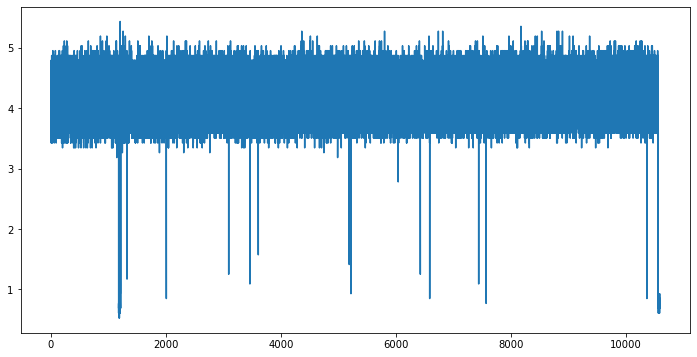

In [ ]:
transmission_PD = combined_df.iloc[:,1].astype(float)
voltage2 = combined_df.iloc[:,2].astype(float)
voltage3 = combined_df.iloc[:,3].astype(float)
voltage4 = combined_df.iloc[:,4].astype(float)
time = np.arange(0, len(voltage1)*0.008, 0.008)

plt.figure(figsize=(12, 6))
plt.plot(time, voltage1, label='Channel 1')